<a href="https://colab.research.google.com/github/zidanardany/ai-mastery/blob/main/Tugas_NLP1_Mochammad_Zidan_Ardany.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# Sambungkan Google Colab dengan Google Drive
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# Pindahkan direktori ke folder eksperimen
%cd /content/gdrive/MyDrive/Colab Notebooks/Tugas NLP

/content/gdrive/MyDrive/Colab Notebooks/Tugas NLP


In [ ]:
!pip -q install sastrawi

     |████████████████████████████████| 209 kB 4.2 MB/s 


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# tools untuk mempermudah kita dalam menyimpan objek
import joblib

# Data Acquisition

In [ ]:
data = pd.read_csv('20191002-reviews.csv')
data.head()

,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
0,100002528,beli-harddisk-eksternal,Kamal U.,5,NaN,NaN,bagus mantap dah sesui pesanan,0,0,0,True,26.51,09 Apr 2019,androidApp,2019-10-02
1,100002528,beli-harddisk-eksternal,yofanca m.,4,NaN,NaN,"Bagus, sesuai foto",0,0,0,True,22.49,24 Sep 2017,androidApp,2019-10-02
2,100002528,beli-harddisk-eksternal,Lazada Customer,5,NaN,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,True,21.50,04 Apr 2018,androidApp,2019-10-02
3,100002528,beli-harddisk-eksternal,Lazada Customer,4,NaN,NaN,bagus sesuai,0,0,0,True,20.51,22 Sep 2017,androidApp,2019-10-02
4,100002528,beli-harddisk-eksternal,Yosep M.,5,NaN,NaN,NaN,0,0,0,True,16.01,17 Agu 2018,androidApp,2019-10-02


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203787 entries, 0 to 203786
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   itemId          203787 non-null  int64  
 1   category        203787 non-null  object 
 2   name            203787 non-null  object 
 3   rating          203787 non-null  int64  
 4   originalRating  8 non-null       float64
 5   reviewTitle     23404 non-null   object 
 6   reviewContent   107029 non-null  object 
 7   likeCount       203787 non-null  int64  
 8   upVotes         203787 non-null  int64  
 9   downVotes       203787 non-null  int64  
 10  helpful         203787 non-null  bool   
 11  relevanceScore  203787 non-null  float64
 12  boughtDate      196680 non-null  object 
 13  clientType      203787 non-null  object 
 14  retrievedDate   203787 non-null  object 
dtypes: bool(1), float64(2), int64(5), object(7)
memory usage: 22.0+ MB


In [ ]:
data_review = data[['rating','reviewContent']]
data_review.head()

,rating,reviewContent
0,5,bagus mantap dah sesui pesanan
1,4,"Bagus, sesuai foto"
2,5,okkkkk mantaaaaaaapppp ... goood
3,4,bagus sesuai
4,5,NaN


In [ ]:
data_review.isnull().value_counts()

rating  reviewContent
False   False            107029
        True              96758
dtype: int64

In [ ]:
new_review = data_review[data_review.reviewContent.notnull()]

new_review.head()

,rating,reviewContent
0,5,bagus mantap dah sesui pesanan
1,4,"Bagus, sesuai foto"
2,5,okkkkk mantaaaaaaapppp ... goood
3,4,bagus sesuai
7,1,bima


In [ ]:
print('Total jumlah review:', new_review.shape[0], 'data\n')
print('Rincian label (rating) beserta totalnya:')
print('-- [0] bintang 1\t:', new_review[new_review.rating==1].shape[0], 'data')
print('-- [0] bintang 2\t:', new_review[new_review.rating==2].shape[0], 'data')
print('-- [0] bintang 3\t:', new_review[new_review.rating==3].shape[0], 'data')
print('-- [0] bintang 4\t:', new_review[new_review.rating==4].shape[0], 'data')
print('-- [0] bintang 5\t:', new_review[new_review.rating==5].shape[0], 'data')

Total jumlah review: 107029 data

Rincian label (rating) beserta totalnya:
-- [0] bintang 1	: 6951 data
-- [0] bintang 2	: 2184 data
-- [0] bintang 3	: 4372 data
-- [0] bintang 4	: 10626 data
-- [0] bintang 5	: 82896 data


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


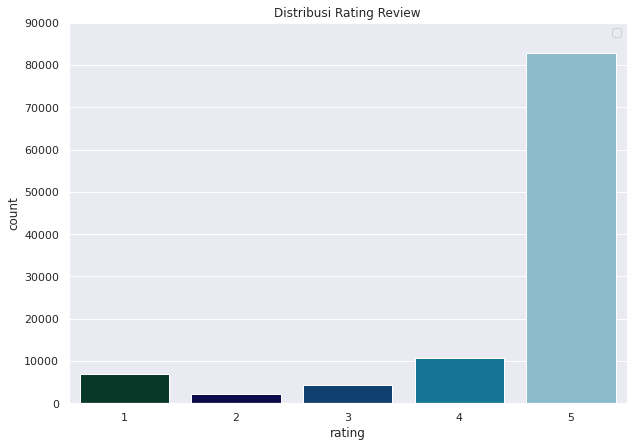

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Distribusi Rating Review')
sns.set_theme()
bar = sns.countplot(new_review.rating, palette='ocean')
bar.set_ylim(0,90000)
plt.legend()
plt.show()

# Text Preprocessing

## Case Folding

In [ ]:
import re

# Buat fungsi untuk langkah case folding
def casefolding(text):
  text = text.lower()                               # Mengubah teks menjadi lower case
  text = re.sub(r'[-+]?[0-9]+', '', text)           # Menghapus angka
  text = re.sub(r'[^\w\s]','', text)                # Menghapus karakter tanda baca
  text = text.strip()
  return text

Pada langkah case folding ini saya tidak menggunakan remove url, karena pada dataset yang digunakan tidak terdapat string url

In [ ]:
raw_sample = new_review.reviewContent.iloc[480]
case_folding = casefolding(raw_sample)

print('Raw data\t: ', raw_sample)
print('Case folding\t: ', case_folding)

Raw data	:  Barang hari ini pesen di anternya juga hari ini tapi mana ??  Di tunggu 24jam gak ad !@ Saya pesan dan tf tgl 2 jam 7 pagi  Tolong dong. Gojek nya juga susah di hubungi
Case folding	:  barang hari ini pesen di anternya juga hari ini tapi mana   di tunggu jam gak ad  saya pesan dan tf tgl  jam  pagi  tolong dong gojek nya juga susah di hubungi


## Word Normalization

In [ ]:
# Download corpus singkatan
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv

--2022-04-01 13:01:46--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80969 (79K) [text/plain]
Saving to: ‘key_norm.csv.1’

key_norm.csv.1      100%[===================>]  79.07K  --.-KB/s    in 0.02s   

2022-04-01 13:01:46 (3.66 MB/s) - ‘key_norm.csv.1’ saved [80969/80969]



In [ ]:
key_norm = pd.read_csv('key_norm.csv')

def text_normalize(text):
  text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text.split()])
  text = str.lower(text)
  return text

In [ ]:
raw_text = new_review.reviewContent.iloc[480]
case_folding = casefolding(raw_text)
word_normalization = text_normalize(case_folding)

print('Raw text\t: ', raw_text)
print('Case folding\t: ', case_folding)
print('Word normalization\t: ', word_normalization)

Raw text	:  Barang hari ini pesen di anternya juga hari ini tapi mana ??  Di tunggu 24jam gak ad !@ Saya pesan dan tf tgl 2 jam 7 pagi  Tolong dong. Gojek nya juga susah di hubungi
Case folding	:  barang hari ini pesen di anternya juga hari ini tapi mana   di tunggu jam gak ad  saya pesan dan tf tgl  jam  pagi  tolong dong gojek nya juga susah di hubungi
Word normalization	:  barang hari ini pesan di anternya juga hari ini tapi mana di tunggu jam tidak ada saya pesan dan tf tanggal jam pagi tolong dong gojek nya juga susah di hubungi


## Filtering (Stopwords Removal)

In [ ]:
from nltk.corpus import stopwords

stopwords_id = stopwords.words('indonesian')

In [ ]:
# Lihat daftar stopwords Indonesia yang disediakan NLTK
stopwords_id

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [ ]:
# Buat fungsi untuk langkah stopwords removal

def remove_stopwords(text):
  clean_word = []
  all_text = text.split()
  for word in all_text:
    if word not in stopwords_id:
      clean_word.append(word)
  return ' '.join(clean_word)

In [ ]:
raw_text = new_review.reviewContent.iloc[480]
case_folding = casefolding(raw_text)
word_normalization = text_normalize(case_folding)
stopwords_removal = remove_stopwords(word_normalization)

print('Raw text\t: ', raw_text)
print('Case folding\t: ', case_folding)
print('Word normalization\t: ', word_normalization)
print('Stopwords removal\t: ', stopwords_removal)

Raw text	:  Barang hari ini pesen di anternya juga hari ini tapi mana ??  Di tunggu 24jam gak ad !@ Saya pesan dan tf tgl 2 jam 7 pagi  Tolong dong. Gojek nya juga susah di hubungi
Case folding	:  barang hari ini pesen di anternya juga hari ini tapi mana   di tunggu jam gak ad  saya pesan dan tf tgl  jam  pagi  tolong dong gojek nya juga susah di hubungi
Word normalization	:  barang hari ini pesan di anternya juga hari ini tapi mana di tunggu jam tidak ada saya pesan dan tf tanggal jam pagi tolong dong gojek nya juga susah di hubungi
Stopwords removal	:  barang pesan anternya tunggu jam pesan tf tanggal jam pagi tolong gojek nya susah hubungi


## Stemming

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Buat fungsi untuk langkah stemming Bahasa Indonesia
def stemming(text):
  text = stemmer.stem(text)
  return text

In [ ]:
raw_text = new_review.reviewContent.iloc[480]
case_folding = casefolding(raw_text)
word_normalization = text_normalize(case_folding)
stopwords_removal = remove_stopwords(word_normalization)
text_stemming = stemming(stopwords_removal)

print('Raw text\t: ', raw_text)
print('Case folding\t: ', case_folding)
print('Word normalization\t: ', word_normalization)
print('Stopwords removal\t: ', stopwords_removal)
print('Stemming\t: ', text_stemming)

Raw text	:  Barang hari ini pesen di anternya juga hari ini tapi mana ??  Di tunggu 24jam gak ad !@ Saya pesan dan tf tgl 2 jam 7 pagi  Tolong dong. Gojek nya juga susah di hubungi
Case folding	:  barang hari ini pesen di anternya juga hari ini tapi mana   di tunggu jam gak ad  saya pesan dan tf tgl  jam  pagi  tolong dong gojek nya juga susah di hubungi
Word normalization	:  barang hari ini pesan di anternya juga hari ini tapi mana di tunggu jam tidak ada saya pesan dan tf tanggal jam pagi tolong dong gojek nya juga susah di hubungi
Stopwords removal	:  barang pesan anternya tunggu jam pesan tf tanggal jam pagi tolong gojek nya susah hubungi
Stemming	:  barang pesan anter tunggu jam pesan tf tanggal jam pagi tolong gojek nya susah hubung


## Text Preprocessing Pipeline

In [ ]:
# Buat fungsi untuk menggabungkan seluruh langkah pada text preprocessing
def text_preprocessing_process(text):
  text = casefolding(text)
  text = text_normalize(text)
  text = remove_stopwords(text)
  text = stemming(text)
  return text

In [ ]:
new_review.shape

(107029, 2)

In [ ]:
%%time
clean_review = new_review.iloc[:5000]
clean_review['clean_teks'] = clean_review.reviewContent.apply(text_preprocessing_process)

CPU times: user 10min 55s, sys: 2.51 s, total: 10min 58s
Wall time: 11min 3s


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
clean_review

,rating,reviewContent,clean_teks
0,5,bagus mantap dah sesui pesanan,bagus mantap sesui pesan
1,4,"Bagus, sesuai foto",bagus sesuai foto
2,5,okkkkk mantaaaaaaapppp ... goood,okkkkk mantaaaaaaapppp goood
3,4,bagus sesuai,bagus sesuai
7,1,bima,bima
...,...,...,...
10224,5,"Barang sesuai dengan deskripsi, bonus sesuai d...",barang sesuai deskripsi bonus sesuai kirim cep...
10225,5,Thanks to Lazada. Barangnya sesuai pesanan. Aq...,terimakasih lazada barang sesuai pesan suka ba...
10226,5,"Barang sampai di tujuan dengan cepat, packing ...",barang tuju cepat packing rapi barang sesuai d...
10227,3,sejauh ini bagus tpi belo dala jagka waktu yan...,bagus belo dala jagka tunggu sapai at least mi...


In [ ]:
# Simpan data yang telah melalui text preprocessing agar kita tidak perlu menjalankan proses tersebut mulai awal (Opsional)
clean_review.to_csv('clean_data.csv')

## Kesimpulan
Hampir semua langkah text preprocessing perlu digunakan pada dataset ini, kecuali remove url karena tidak ada string url pada dataset ini.

# Feature Engineering

In [ ]:
data = pd.read_csv('clean_data.csv')

In [ ]:
# Pisahkan kolom feature dan target
X = data['clean_teks']
y = data['rating']

In [ ]:
X

0                                bagus mantap sesui pesan
1                                       bagus sesuai foto
2                            okkkkk mantaaaaaaapppp goood
3                                            bagus sesuai
4                                                    bima
                              ...                        
4995    barang sesuai deskripsi bonus sesuai kirim cep...
4996    terimakasih lazada barang sesuai pesan suka ba...
4997    barang tuju cepat packing rapi barang sesuai d...
4998    bagus belo dala jagka tunggu sapai at least mi...
4999    barang kirim sesuai pesan bonus lengkap packin...
Name: clean_teks, Length: 5000, dtype: object

In [ ]:
y

0       5
1       4
2       5
3       4
4       1
       ..
4995    5
4996    5
4997    5
4998    3
4999    5
Name: rating, Length: 5000, dtype: int64

## Feature Extraction

### Bag of Words & N-Gram
Proses mengubah teks menjadi bentuk vektor menggunakan metode BoW

#### N-Gram = 1

In [ ]:
'''
Mengubah kumpulan dokumen teks menjadi matriks jumlah token.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
'''

from sklearn.feature_extraction.text import CountVectorizer

# Bag of Words menggunakan unigram
bow = CountVectorizer(ngram_range=(1,1))
bow.fit(X.astype('U'))

CountVectorizer()

In [ ]:
# Melihat jumlah token / fitur yang dihasilkan Bag of Words
len(bow.get_feature_names_out())

4555

In [ ]:
# Melihat fitur-fitur apa saja yang ada dalam korpus
bow.get_feature_names_out()

array(['ababila', 'abal', 'abang', ..., 'zonk', 'zs', 'zuma'],
      dtype=object)

In [ ]:
# Melihat matriks jumlah token
# Hasil ini, siap dimasukkan (di fit kan) dalam proses modelling (machine learning)

X_bow = bow.transform(X.astype('U')).toarray()
X_bow

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
data_bow = pd.DataFrame(X_bow, columns=bow.get_feature_names_out())
data_bow

,ababila,abal,abang,abizzzx,acara,accessories,aceh,acer,activation,activationnyacode,...,yya,zada,zeb,zenfone,zipper,zippernya,zone,zonk,zs,zuma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
with open('bow_ngram_1.joblib', 'wb') as output:
  joblib.dump(X_bow, output)

#### N-Gram = 1 & 2

In [ ]:
'''
Mengubah kumpulan dokumen teks menjadi matriks jumlah token.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
'''

from sklearn.feature_extraction.text import CountVectorizer

# Bag of Words menggunakan unigram
bow = CountVectorizer(ngram_range=(1,2))
bow.fit(X.astype('U'))

CountVectorizer(ngram_range=(1, 2))

In [ ]:
# Melihat jumlah token / fitur yang dihasilkan Bag of Words
len(bow.get_feature_names_out())

21549

In [ ]:
# Melihat fitur-fitur apa saja yang ada dalam korpus
bow.get_feature_names_out()

array(['ababila', 'ababila hanphone', 'abal', ..., 'zs', 'zs samsung',
       'zuma'], dtype=object)

In [ ]:
# Melihat matriks jumlah token
# Hasil ini, siap dimasukkan (di fit kan) dalam proses modelling (machine learning)

X_bow_2 = bow.transform(X.astype('U')).toarray()
X_bow_2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
data_bow_2 = pd.DataFrame(X_bow_2, columns=bow.get_feature_names_out())
data_bow_2

,ababila,ababila hanphone,abal,abal abal,abal file,abal lagibaguslahmksh,abal lazada,abal nih,abang,abang gojek,...,zipper,zipper nya,zippernya,zippernya kecewa,zone,zonk,zonk deeh,zs,zs samsung,zuma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
with open('bow_ngram_2.joblib', 'wb') as output:
  joblib.dump(X_bow_2, output)

### TF-IDF & N-Gram
Proses mengubah teks menjadi vector menggunakan metode TF-IDF

#### N-Gram = 1

In [ ]:
'''
Mengubah kumpulan dokumen mentah menjadi matriks fitur TF-IDF
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
'''
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(ngram_range=(1,1))
tf_idf.fit(X.astype('U'))

TfidfVectorizer()

In [ ]:
# Melihat Jumlah Fitur
print(len(tf_idf.get_feature_names_out()))

4555


In [ ]:
# Melihat fitur-fitur apa saja yang ada di dalam corpus
print(tf_idf.get_feature_names_out())

['ababila' 'abal' 'abang' ... 'zonk' 'zs' 'zuma']


In [ ]:
# Melihat matriks jumlah token
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

X_tf_idf = tf_idf.transform(X.astype('U')).toarray()
X_tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Melihat matriks jumlah token menggunakan TF IDF, lihat perbedaannya dengan metode BoW
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

data_tf_idf = pd.DataFrame(X_tf_idf, columns=tf_idf.get_feature_names_out())
data_tf_idf

,ababila,abal,abang,abizzzx,acara,accessories,aceh,acer,activation,activationnyacode,...,yya,zada,zeb,zenfone,zipper,zippernya,zone,zonk,zs,zuma
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
with open('tf_idf_feature.joblib', 'wb') as output:
  joblib.dump(X_tf_idf, output)

#### N-Gram = 1 & 2

In [ ]:
'''
Mengubah kumpulan dokumen mentah menjadi matriks fitur TF-IDF
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
'''
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(ngram_range=(1,2))
tf_idf.fit(X.astype('U'))

TfidfVectorizer(ngram_range=(1, 2))

In [ ]:
# Melihat Jumlah Fitur
print(len(tf_idf.get_feature_names_out()))

21549


In [ ]:
# Melihat fitur-fitur apa saja yang ada di dalam corpus
print(tf_idf.get_feature_names_out())

['ababila' 'ababila hanphone' 'abal' ... 'zs' 'zs samsung' 'zuma']


In [ ]:
# Melihat matriks jumlah token
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

X_tf_idf_2 = tf_idf.transform(X.astype('U')).toarray()
X_tf_idf_2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Melihat matriks jumlah token menggunakan TF IDF, lihat perbedaannya dengan metode BoW
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

data_tf_idf_2 = pd.DataFrame(X_tf_idf_2, columns=tf_idf.get_feature_names_out())
data_tf_idf_2

,ababila,ababila hanphone,abal,abal abal,abal file,abal lagibaguslahmksh,abal lazada,abal nih,abang,abang gojek,...,zipper,zipper nya,zippernya,zippernya kecewa,zone,zonk,zonk deeh,zs,zs samsung,zuma
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
with open('tf_idf_feature_2.joblib', 'wb') as output:
  joblib.dump(X_tf_idf_2, output)

### Kesimpulan
Semakin banyak N-Gram yang digunakan akan meningkatkan jumlah fitur, baik dengan metode ekstraksi fitur BoW maupun TF-IDF

## Feature Selection

### N-Gram = 1

In [ ]:
# Mengubah nilai data tabular tf-idf menjadi array agar dapat dijalankan pada proses seleksi fitur
X = np.array(data_tf_idf)
y = np.array(y)

In [ ]:
'''
Pilih fitur menggunakan skor k tertinggi.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

Hitung statistik chi-square antara setiap fitur dan kelas non-negatif.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html
'''

from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 

# K features with highest chi-squared statistics are selected 
chi2_features = SelectKBest(chi2, k=1000) 
X_kbest_features = chi2_features.fit_transform(X, y) 
  
# Reduced features 
print('Original feature number:', X.shape[1]) 
print('Reduced feature number:', X_kbest_features.shape[1]) 

Original feature number: 4555
Reduced feature number: 1000


In [ ]:
# chi2_features.scores_ adalah nilai chi-square, semakin tinggi nilainya maka semakin baik fiturnya
data_chi2 = pd.DataFrame(chi2_features.scores_, columns=['nilai'])
data_chi2

,nilai
0,2.984954
1,7.032114
2,2.724396
3,0.346109
4,3.400240
...,...
4550,10.664959
4551,2.716989
4552,0.186630
4553,0.115635


In [ ]:
# Menampilkan fitur beserta nilainya
feature = tf_idf.get_feature_names_out()
data_chi2['fitur'] = feature
data_chi2

,nilai,fitur
0,2.984954,ababila
1,7.032114,abal
2,2.724396,abang
3,0.346109,abizzzx
4,3.400240,acara
...,...,...
4550,10.664959,zippernya
4551,2.716989,zone
4552,0.186630,zonk
4553,0.115635,zs


In [ ]:
# Mengurutkan fitur terbaik
data_chi2.sort_values(by='nilai', ascending=False)

,nilai,fitur
3541,57.213178,rusak
1712,51.008167,inch
1824,50.404275,jelek
407,49.917277,batal
1975,45.317496,kecewa
...,...,...
2893,0.047948,oi
630,0.047948,brjalan
4366,0.047948,unuk
4231,0.047948,tolol


In [ ]:
# Menampilkan mask pada feature yang diseleksi
# False berarti fitur tidak terpilih dan True berarti fitur terpilih
mask = chi2_features.get_support()
mask

array([False,  True, False, ..., False, False, False])

In [ ]:
# Menampilkan fitur-fitur terpilih berdasarkan mask atau nilai tertinggi yang sudah dikalkulasi pada Chi-Square
new_feature = []

for bool, f in zip(mask, feature):
  if bool:
    new_feature.append(f)
  selected_feature = new_feature

selected_feature

['abal',
 'activationnyacode',
 'agustus',
 'ah',
 'ahaa',
 'ajj',
 'aju',
 'aktivasi',
 'aktivasitaapi',
 'akun',
 'akur',
 'alamat',
 'alas',
 'alat',
 'alesan',
 'alhasil',
 'alhmdlh',
 'aman',
 'amin',
 'aminn',
 'ampas',
 'aneh',
 'anter',
 'antivirus',
 'antivirusnya',
 'ap',
 'apadah',
 'apkah',
 'aqua',
 'aquanya',
 'arah',
 'arduino',
 'asalamualaikum',
 'aspal',
 'asuuu',
 'auto',
 'available',
 'awet',
 'awetawetnya',
 'ba',
 'bab',
 'babakan',
 'baca',
 'back',
 'backpack',
 'bagis',
 'bagus',
 'baguscm',
 'bagusharga',
 'baguskalo',
 'bagusmelebihi',
 'bagusthx',
 'bal',
 'balikin',
 'bandung',
 'banget',
 'bangetbarang',
 'bangetkirain',
 'bangkrut',
 'bank',
 'banyak',
 'baracuda',
 'baran',
 'barang',
 'barangny',
 'barangnyacma',
 'barangx',
 'basic',
 'basics',
 'bata',
 'batal',
 'batalin',
 'batalkn',
 'batas',
 'baut',
 'bayar',
 'bca',
 'be',
 'beda',
 'beep',
 'bekas',
 'beli',
 'belo',
 'bener',
 'beneran',
 'benget',
 'bengkulu',
 'besar',
 'besarbonus',
 'bgss

In [ ]:
# Lihat vocab yang dihasilkan oleh tf-idf
# tf_idf.vocabulary_

kbest_feature = {} # buat dictionary kosong

for (k,v) in tf_idf.vocabulary_.items(): # iterasi untuk mengulangi vocab yang dihasilkan TF_IDF
  if k in selected_feature:              # cek apakah fitur termasuk k fitur yang dieseleksi
    kbest_feature[k] = v 

In [ ]:
# Menampilkan fitur-fitur yang sudah diseleksi 
# Beserta nilai vektornya pada keseluruhan data untuk dijalankan pada proses machine learning

# Hanya k fitur yang terpilih sesuai parameter k yang ditentukan sebelumnya

data_selected_feature = pd.DataFrame(X_kbest_features, columns=selected_feature)
data_selected_feature

,abal,activationnyacode,agustus,ah,ahaa,ajj,aju,aktivasi,aktivasitaapi,akun,...,ya,yacc,yah,yahik,yapersyaratan,yaudalah,yeee,yet,ygcabang,zippernya
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
with open('kbest_feature.joblib', 'wb') as output:
  joblib.dump(kbest_feature, output)

### N-Gram = 1 & 2

In [ ]:
# Mengubah nilai data tabular tf-idf menjadi array agar dapat dijalankan pada proses seleksi fitur
X = np.array(data_tf_idf_2)
y = np.array(y)

In [ ]:
'''
Pilih fitur menggunakan skor k tertinggi.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

Hitung statistik chi-square antara setiap fitur dan kelas non-negatif.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html
'''

from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 

# K features with highest chi-squared statistics are selected 
chi2_features = SelectKBest(chi2, k=1000) 
X_kbest_features = chi2_features.fit_transform(X, y) 
  
# Reduced features 
print('Original feature number:', X.shape[1]) 
print('Reduced feature number:', X_kbest_features.shape[1]) 

Original feature number: 21549
Reduced feature number: 1000


In [ ]:
# chi2_features.scores_ adalah nilai chi-square, semakin tinggi nilainya maka semakin baik fiturnya
data_chi2 = pd.DataFrame(chi2_features.scores_, columns=['nilai'])
data_chi2

,nilai
0,2.036093
1,2.036093
2,4.161323
3,0.101099
4,4.213121
...,...
21544,0.123061
21545,0.123061
21546,0.080154
21547,0.080154


In [ ]:
# Menampilkan fitur beserta nilainya
feature = tf_idf.get_feature_names_out()
data_chi2['fitur'] = feature
data_chi2

,nilai,fitur
0,2.036093,ababila
1,2.036093,ababila hanphone
2,4.161323,abal
3,0.101099,abal abal
4,4.213121,abal file
...,...,...
21544,0.123061,zonk
21545,0.123061,zonk deeh
21546,0.080154,zs
21547,0.080154,zs samsung


In [ ]:
# Mengurutkan fitur terbaik
data_chi2.sort_values(by='nilai', ascending=False)

,nilai,fitur
21368,42.478261,xxnnxif
4475,42.478261,credit
8512,40.517576,jelek
8016,37.141529,inch
17026,36.539415,rusak
...,...,...
11952,0.032979,mari tolol
14584,0.032979,pakai hddnya
9719,0.032979,kesel lihat
14515,0.032979,paham kesel


In [ ]:
# Menampilkan mask pada feature yang diseleksi
# False berarti fitur tidak terpilih dan True berarti fitur terpilih
mask = chi2_features.get_support()
mask

array([False, False, False, ..., False, False, False])

In [ ]:
# Menampilkan fitur-fitur terpilih berdasarkan mask atau nilai tertinggi yang sudah dikalkulasi pada Chi-Square
new_feature = []

for bool, f in zip(mask, feature):
  if bool:
    new_feature.append(f)
  selected_feature = new_feature

selected_feature

['abal nih',
 'activationnyacode',
 'activationnyacode nyaa',
 'aju',
 'aju kembali',
 'alat transfer',
 'ambil ekspedisi',
 'aminn',
 'and only',
 'aneh',
 'aneh status',
 'aneh untung',
 'antivirus bias',
 'antivirus gagal',
 'antivirus kappersky',
 'apadah',
 'apadah dtangy',
 'aqua',
 'arduino',
 'arduino hubung',
 'available',
 'available wilayag',
 'awet aminn',
 'baca',
 'baca colok',
 'baca gbsemoga',
 'baca kadang',
 'baca laptoptv',
 'baca stelah',
 'backup file',
 'bagus',
 'bagus cacatthankslazada',
 'bagus cmn',
 'bagus file',
 'bagus fix',
 'bagus kak',
 'bagus kurir',
 'bagus sayang',
 'baguscm',
 'baguscm kecewa',
 'bal home',
 'balikin',
 'bang upgrade',
 'banget buset',
 'banget capek',
 'banget external',
 'bangetkirain',
 'bangetkirain gambar',
 'bank',
 'banyak gadoin',
 'barang bagus',
 'barang bangetkirain',
 'barang bgusmemori',
 'barang bohong',
 'barang jelek',
 'barang kau',
 'barang khusus',
 'barang krim',
 'barang lumayan',
 'barang muat',
 'barang mulusss

In [ ]:
# Lihat vocab yang dihasilkan oleh tf-idf
# tf_idf.vocabulary_

kbest_feature_2 = {} # buat dictionary kosong

for (k,v) in tf_idf.vocabulary_.items(): # iterasi untuk mengulangi vocab yang dihasilkan TF_IDF
  if k in selected_feature:              # cek apakah fitur termasuk k fitur yang dieseleksi
    kbest_feature_2[k] = v 

In [ ]:
# Menampilkan fitur-fitur yang sudah diseleksi 
# Beserta nilai vektornya pada keseluruhan data untuk dijalankan pada proses machine learning

# Hanya k fitur yang terpilih sesuai parameter k yang ditentukan sebelumnya

data_selected_feature = pd.DataFrame(X_kbest_features, columns=selected_feature)
data_selected_feature

,abal nih,activationnyacode,activationnyacode nyaa,aju,aju kembali,alat transfer,ambil ekspedisi,aminn,and only,aneh,...,ya,ya inch,ya judul,ya layar,yahik,yahik hik,ygcabang,ygcabang beli,zippernya,zippernya kecewa
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
with open('kbest_feature_2.joblib', 'wb') as output:
  joblib.dump(kbest_feature_2, output)

### Kesimpulan
Sepertinya fitur yang dipilih pada dataset hasil ekstraksi fitur menggunakan N-Gram = 1 & 2 lebih baik dan lebih relevan daripada fitur yang dipilih pada dataset hasil ekstraksi fitur menggunakan N-Gram = 1. 

Meskipun sebenarnya keduanya masih ada fitur/term yang tidak relevan, 
tetapi mayoritas feature hasil seleksi relevan 

# WordCloud
WordCloud digunakan untuk melihat secara visual kata-kata yang paling sering muncul.

In [ ]:
# Import Library WordCloud. 
# Import Library cv2 untuk mengolah gambar menjadi masking WordCloud

import cv2
from wordcloud import WordCloud

In [ ]:
# Download gambar masking
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg

--2022-04-03 07:26:48--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34396 (34K) [image/jpeg]
Saving to: ‘cloud.jpg’

cloud.jpg           100%[===================>]  33.59K  --.-KB/s    in 0.003s  

2022-04-03 07:26:48 (11.7 MB/s) - ‘cloud.jpg’ saved [34396/34396]



In [ ]:
originalImage = cv2.imread('cloud.jpg')
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
(thresh, cloud_mask) = cv2.threshold(grayImage, 100, 255, cv2.THRESH_BINARY)

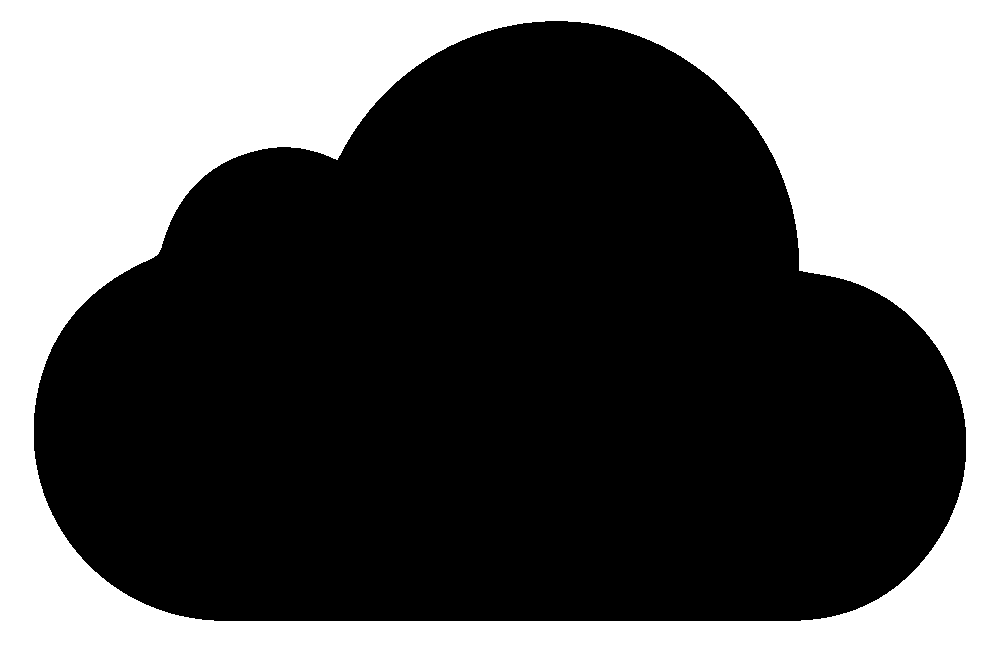

In [ ]:
# Tampilkan masking
from google.colab.patches import cv2_imshow

cv2_imshow(cloud_mask)

## Rating 1

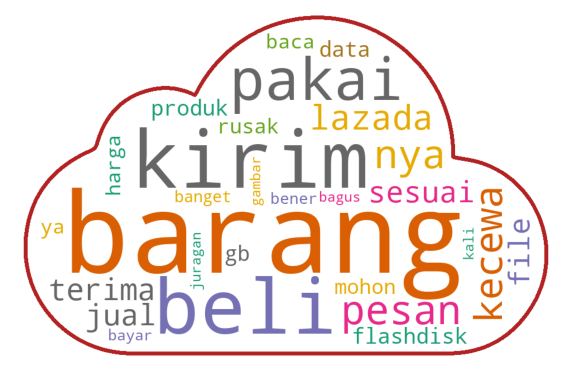

In [ ]:
# WordCloud Rating 1

rating_1 = data[data.rating == 1]
normal_string = []

for t in rating_1.clean_teks:
  normal_string.append(t)

normal_string = pd.Series(normal_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Rating 2

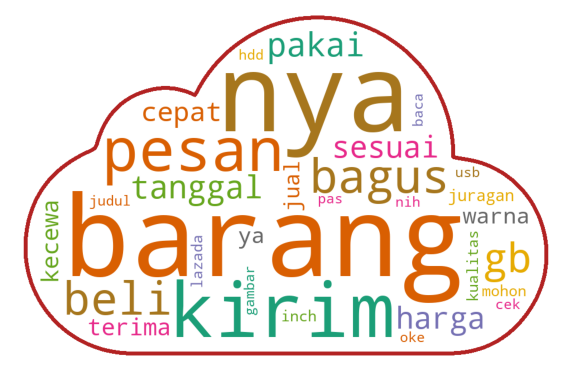

In [ ]:
# WordCloud Rating 2

rating_2 = data[data.rating == 2]
normal_string = []

for t in rating_2.clean_teks:
  normal_string.append(t)

normal_string = pd.Series(normal_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Rating 3

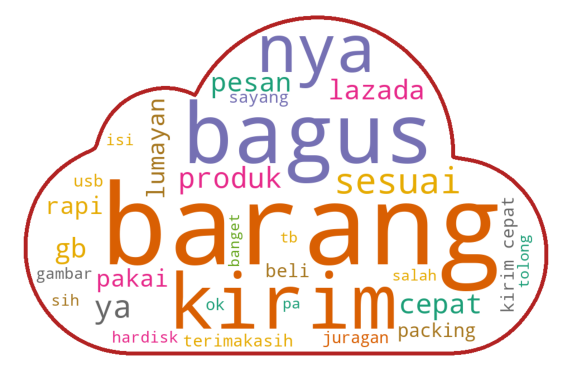

In [ ]:
# WordCloud Rating 3

rating_3 = data[data.rating == 3]
normal_string = []

for t in rating_3.clean_teks:
  normal_string.append(t)

normal_string = pd.Series(normal_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Rating 4

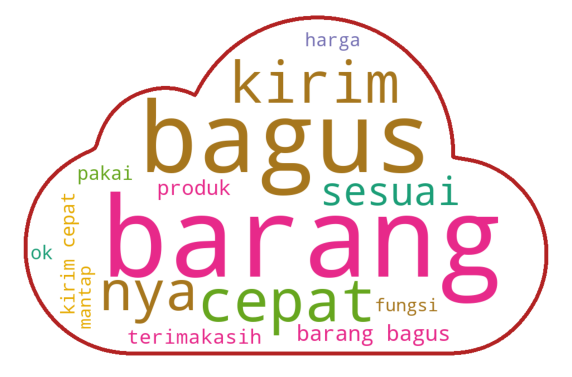

In [ ]:
# WordCloud Rating 4

rating_4 = data[data.rating == 4]
normal_string = []

for t in rating_4.clean_teks:
  normal_string.append(t)

normal_string = pd.Series(normal_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Rating 5

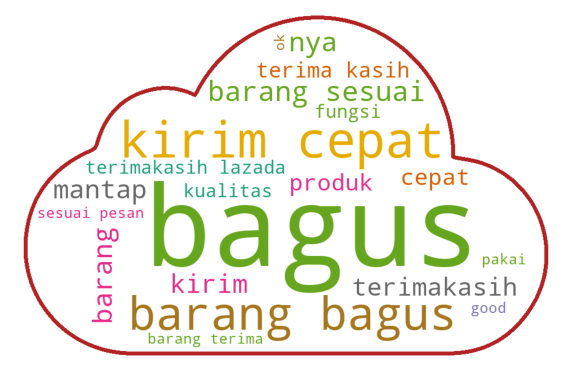

In [ ]:
# WordCloud Rating 5

rating_5 = data[data.rating == 5]
normal_string = []

for t in rating_5.clean_teks:
  normal_string.append(t)

normal_string = pd.Series(normal_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Resume

**Text preprocessing review**: Hampir semua langkah text preprocessing perlu digunakan pada dataset ini, kecuali remove url karena tidak ada string url pada dataset ini.

**Feature selection review**: Sepertinya fitur yang dipilih pada dataset hasil ekstraksi fitur menggunakan N-Gram = 1 & 2 lebih baik dan lebih relevan daripada fitur yang dipilih pada dataset hasil ekstraksi fitur menggunakan N-Gram = 1.

Meskipun sebenarnya keduanya masih ada fitur/term yang tidak relevan, tetapi mayoritas feature hasil seleksi relevan